In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils.plotting import plot_dataset

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
# Load Dataset
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

X = dataset.values
x_cords = dataset['x'].values
y_cords = dataset['y'].values

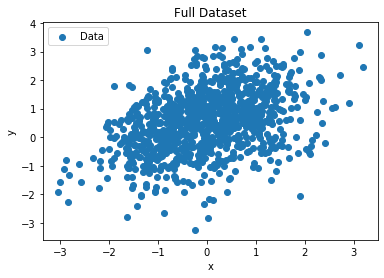

In [3]:
plot_dataset(x_cords, y_cords, 'Full Dataset')

### Split the data into train and test

Now split the dataset into a training set and a test set.
Use the test set in the final evaluation of the model.

### Split features from labels
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [4]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_cords, y_cords, test_size=0.20, random_state=np.random.seed(6))

X = np.stack((x_test, y_test), axis=1)

### Linear regression

Before building a DNN model, start with a linear regression.
One Variable

Start with a single-variable linear regression, to predict `y` from `x`.

Training a model with `tf.keras` typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there are two steps:

- Normalize the input `x`.
- Apply a linear transformation $(y = mx+b)$ to produce 1 output using `layers.Dense`.

The number of inputs can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First create the horsepower `Normalization` layer:

In [5]:
# Build the sequential model
model = tf.keras.Sequential([
    layers.Dense(1, input_dim=1)
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


This model will predict `y` from `x`.

Run the untrained model on the first 10 `x` values. The output won't be good, but you'll see that it has the expected shape, (10,1):




In [6]:
model.predict(x_cords[:10])
print(model.predict(x_cords[:10]))


[[ 2.4554186 ]
 [-0.03604048]
 [-0.0483878 ]
 [-0.8441784 ]
 [ 1.2784238 ]
 [ 4.1715975 ]
 [ 0.5299223 ]
 [-0.8207611 ]
 [ 0.60778385]
 [ 0.10292163]]


Once the model is built, configure the training procedure using the `Model.compile()` method. The most important arguments to compile are the `loss` and the `optimizer` since these define what will be optimized (`mean_absolute_error`) and how (using the `optimizers.Adam`).

In [7]:
model.compile(
    optimizer=tf.optimizers.Adam(lr=1e-3),
    loss='logcosh')

Once the training is configured, use `Model.fit()` to execute the training:

In [8]:
%%time
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0)

Wall time: 14.3 s


Visualize the model's training progress using the stats stored in the history object.

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,val_loss,epoch
95,0.368989,0.331293,95
96,0.368975,0.331278,96
97,0.368966,0.331058,97
98,0.368931,0.331160,98
99,0.368926,0.330980,99


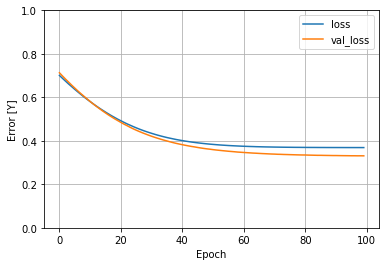

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Y]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Loss: 0.36420594036579135


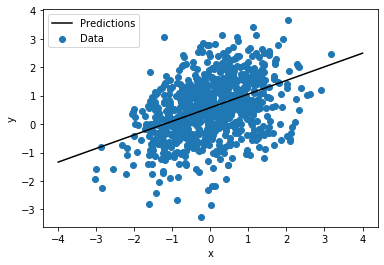

In [11]:
test_results = model.evaluate(
    x_test, y_test, verbose=0)

x = tf.linspace(-4.0, 4.0, 9)
y = model.predict(x)

def plot_model(x, y):
  plt.scatter(x_train, y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

plot_model(x,y)

print(f"Loss: {test_results}")